+ **ماسک ساده**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import io

In [2]:
image_folder = "images"
im_camera = os.path.join(image_folder,"cameraman.tif")
im_church = os.path.join(image_folder,"church.gif")
im_astro = os.path.join(image_folder,"astronaut.png")

In [3]:
im1 = plt.imread(im_camera)
im2 = plt.imread(im_church)
im3 = plt.imread(im_astro)
M,N = im1.shape

In [4]:
X, Y = np.ogrid[0:M, 0:N]

In [9]:
mask = (X - M / 2) ** 2 + (Y - N / 2) ** 2 > M * N / 4

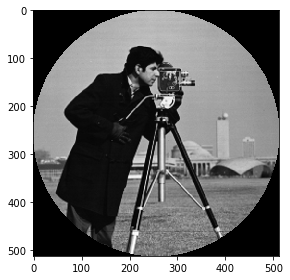

In [10]:
im1[mask] = 0
io.imshow(im1)

**تبدیل Morphing و ترکیب دو تصویر**

In [4]:
alpha = 0.5

In [5]:
im_morph = (1-alpha)*im1 + alpha*im2

In [27]:
def normalize(image): 
    return (image - np.min(image)) / (np.max(image) - np.min(image))

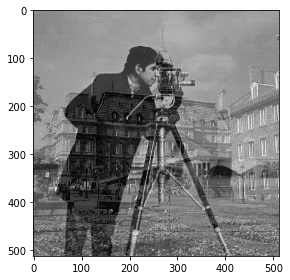

In [7]:
io.imshow(normalize(im_morph))

**تغییر اندازه تصویر**

In [10]:
from skimage.transform import rescale, resize

In [47]:
im_rescale = rescale(im1,1/8)
im_rescale.shape

(64, 64)

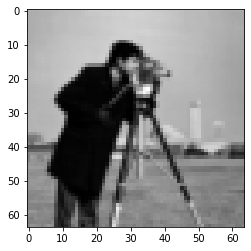

In [48]:
plt.imshow(im_rescale)
plt.gray()

Text(0.5, 1.0, 'Gaussian')

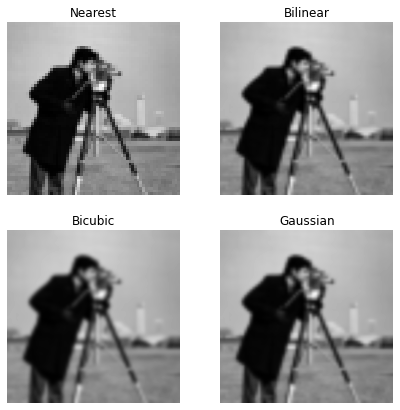

In [40]:
fig, axes = plt.subplots(2,2,figsize=(7,7))
axes[0,0].imshow(im_rescale,interpolation="nearest")
axes[0,0].axis("off")
axes[0,0].set_title("Nearest")
axes[0,1].imshow(im_rescale,interpolation="bilinear")
axes[0,1].axis("off")
axes[0,1].set_title("Bilinear")
axes[1,0].imshow(im_rescale,interpolation="bicubic")
axes[1,0].axis("off")
axes[1,0].set_title("Bicubic")
axes[1,1].imshow(im_rescale,interpolation="gaussian")
axes[1,1].axis("off")
axes[1,1].set_title("Gaussian")

In [49]:
im_resize = resize(im1,(32,32))

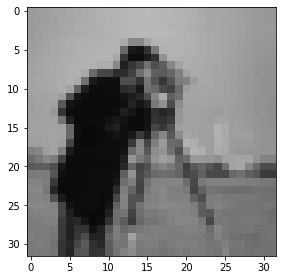

In [50]:
io.imshow(im_resize)

**نگاتیو کردن**

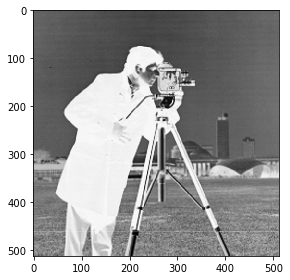

In [51]:
im_negative = 255 - im1
io.imshow(im_negative)

**چرخش تصویر**

In [52]:
from skimage.transform import rotate

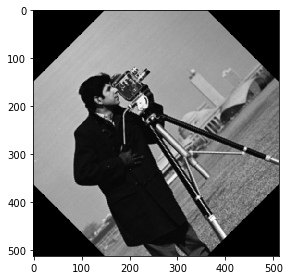

In [53]:
im_rotate = rotate(im1,45.0)
io.imshow(im_rotate)

**تبدیل Affine**

Shear

In [122]:
from skimage.transform import warp

In [123]:
transform_mat = np.array([[1.0,0.2,0],[0.0,1.0,0.0],[0.0,0.0,1.0]])

In [124]:
im_affine = warp(im1,transform_mat)

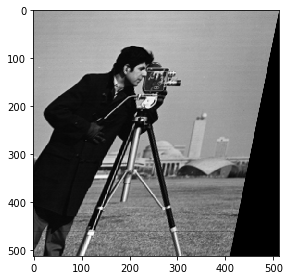

In [125]:
io.imshow(im_affine)

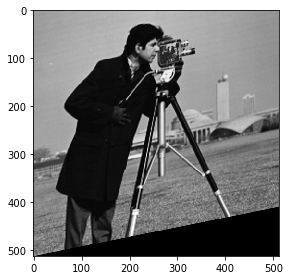

In [126]:
transform_mat = np.array([[1.0,0.0,0],[0.2,1.0,0.0],[0.0,0.0,1.0]])
im_affine = warp(im1,transform_mat)
io.imshow(im_affine)

Translation

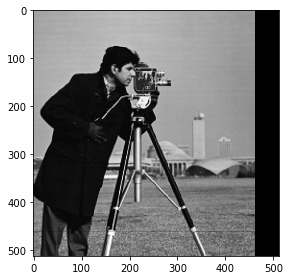

In [132]:
transform_mat = np.array([[1.0,0.0,50.0],[0.0,1.0,0.0],[0.0,0.0,1.0]])
im_affine = warp(im1,transform_mat)
io.imshow(im_affine)

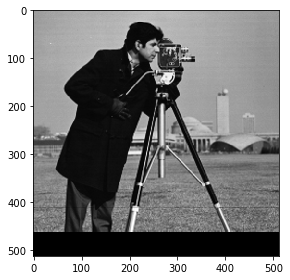

In [133]:
transform_mat = np.array([[1.0,0.0,0.0],[0.0,1.0,50.0],[0.0,0.0,1.0]])
im_affine = warp(im1,transform_mat)
io.imshow(im_affine)

**نویز گوسی**

In [135]:
from skimage.util import random_noise

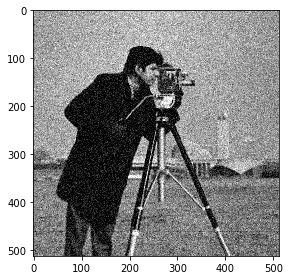

In [136]:
im_noisy = random_noise(im1,mode="gaussian",mean=0.0,var=0.01)
io.imshow(im_noisy)

**نویز فلفلی و نمکی**

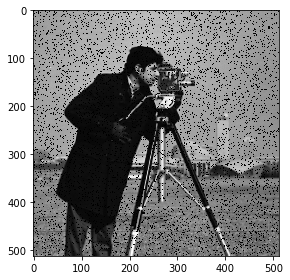

In [137]:
im_noisy = random_noise(im1,mode="pepper",amount = 0.1)
io.imshow(im_noisy)

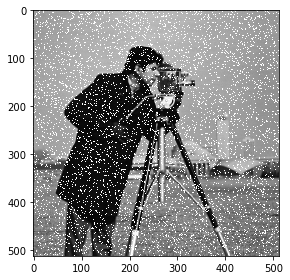

In [138]:
im_noisy = random_noise(im1,mode="salt",amount = 0.1)
io.imshow(im_noisy)

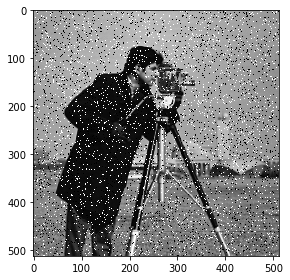

In [142]:
im_noisy = random_noise(im1,mode="s&p",amount = 0.1)
io.imshow(im_noisy)

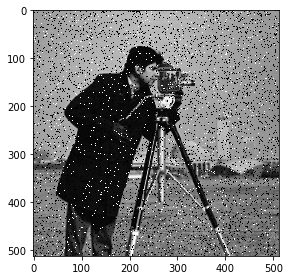

In [141]:
im_noisy = random_noise(im1,mode="s&p",amount = 0.1,salt_vs_pepper=0.2)
io.imshow(im_noisy)

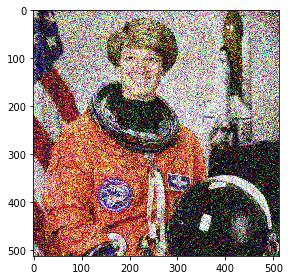

In [149]:
im_noisy = random_noise(im3,mode="gaussian",mean=0.0,var=0.1)
io.imshow(im_noisy)

**اطلاعات آماری تصویر**

In [181]:
X = np.array([[0,128,250],[32,64,200],[128,16,128]])

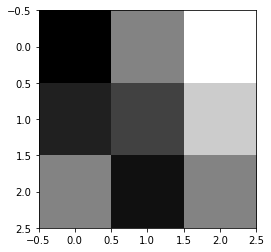

In [182]:
plt.imshow(X)
plt.gray()

In [183]:
np.mean(X)

105.11111111111111

In [184]:
np.mean(X,axis=0)

array([ 53.33333333,  69.33333333, 192.66666667])

In [186]:
np.mean(X,axis=1)

array([126.        ,  98.66666667,  90.66666667])

In [187]:
np.median(X)

128.0

In [188]:
np.median(X,axis=0)

array([ 32.,  64., 200.])

In [191]:
np.median(X,axis=1)

array([128.,  64., 128.])

In [192]:
np.std(X)

79.99506157596986

In [193]:
np.std(X,axis=0)

array([54.38954148, 45.87906809, 50.07549856])

In [194]:
np.std(X,axis=1)

array([102.0718701 ,  72.83466818,  52.79730633])

*تصویر رنگی*

In [151]:
np.mean(im3)

0.44940782

In [205]:
X = np.median(im3,axis=2)
X.shape

(512, 512)

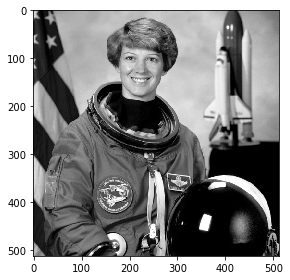

In [206]:
io.imshow(X)

**نویز متناوب**

In [51]:
X, Y = np.ogrid[0:M, 0:N]

In [52]:
noise = 0.2*np.sin(X+Y)

In [144]:
from skimage import img_as_float

In [145]:
im1 = img_as_float(im1)#convert to 0~1 range

In [146]:
im_noisy = im1 + noise

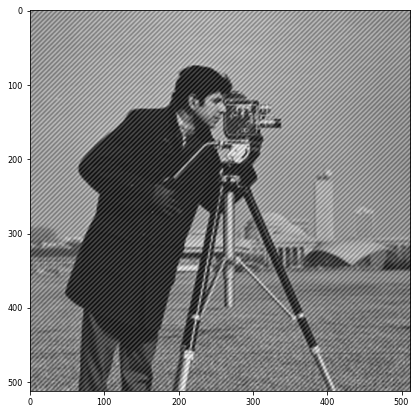

In [147]:
plt.figure(figsize=(7,7))
plt.imshow(im_noisy)
plt.gray()

**هیستوگرام تصویر**

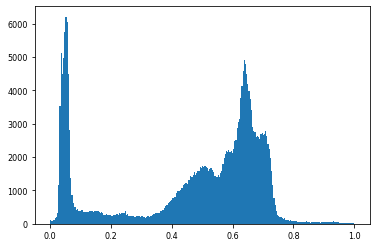

In [164]:
plt.hist(im1.ravel(),bins=256)
plt.show()

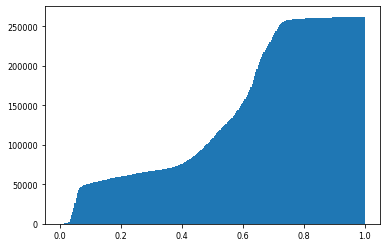

In [216]:
plt.hist(im1.ravel(),bins=256,cumulative=True)
plt.show()

In [165]:
from skimage import exposure

In [176]:
hist,bins = exposure.histogram(im1)

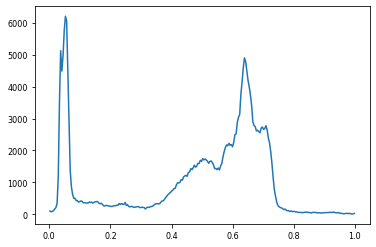

In [177]:
plt.plot(bins,hist)

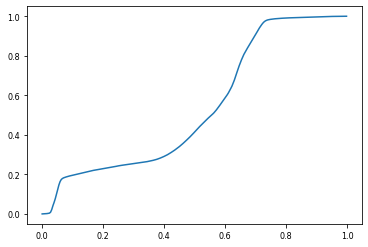

In [217]:
hist,bins = exposure.cumulative_distribution(im1)
plt.plot(bins,hist)

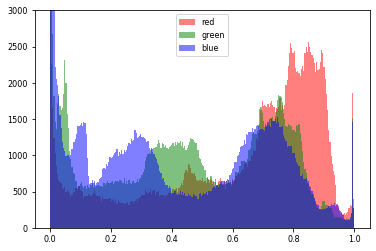

In [215]:
channel_id = [0,1,2]
colors = ["red","green","blue"]
plt.ylim([0,3000])
for ch in channel_id:
    plt.hist(im3[...,ch].flatten(),bins=256,color=colors[ch],alpha=0.5)
plt.legend(colors)
plt.show()

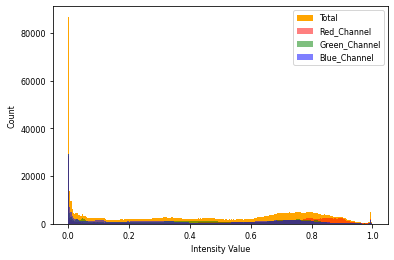

In [196]:
_ = plt.hist(im4.ravel(), bins = 256, color = 'orange', )
_ = plt.hist(im4[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(im4[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(im4[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

**اختلاف بین دو تصویر**

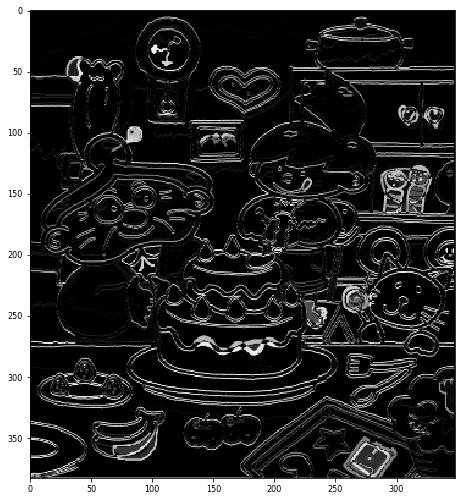

In [251]:
im_diff1 = os.path.join(image_folder,"diff1.png")
im_diff2 = os.path.join(image_folder,"diff2.png")
plt.figure(figsize=(7,7))
diff1 = io.imread(im_diff1,as_gray=True)
diff2 = io.imread(im_diff2,as_gray=True)
from skimage.util import compare_images
diff = compare_images(diff1,diff2,method='diff')
io.imshow(diff)

In [3]:
im_plate = os.path.join(image_folder,"plate.png")
plate = io.imread(im_plate,as_gray=True)

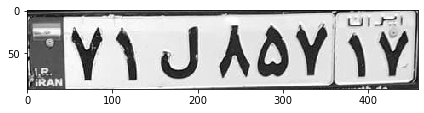

In [4]:
io.imshow(plate)

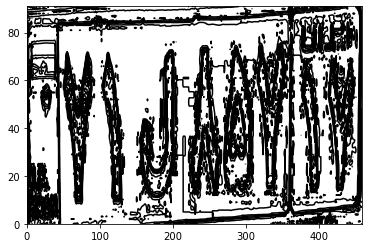

In [86]:
a = plt.contour(np.flipud(plate), colors='k')

In [5]:
from skimage.measure import find_contours

In [24]:
contours = find_contours(np.flipud(plate),0.7)

(-22.900000000000002, 480.9, -4.55, 95.55)

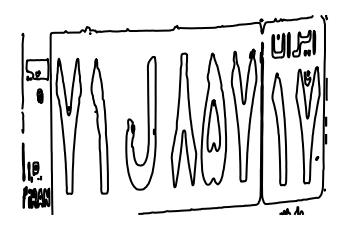

In [85]:
for contour in contours:
    a = plt.plot(contour[:, 1], contour[:, 0], linewidth=2,color='k')
plt.axis("off")